['4' '23' '26' '10' '10' '4' '2' '1']
['1' '16' '16' '15' '7' '3' '2' '0']
['10' '17' '6' '2' '2' '3' '0' '0']


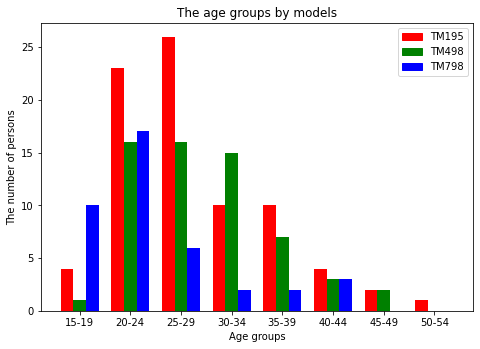

In [90]:
'''
Import packages
'''
#Preprocess
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Array package
import numpy as np


'''
Subfunctions
'''
def Set_AgeGroups(Data,Age_Range):
    Age_groups = [0,0,0,0,0,0,0,0]

    Set_Index = 0
    Age_Flag = Data[0][0]//5
    for temp in Data:
        if temp[0]//Age_Range != Age_Flag:
            Set_Index+=1
            Age_Flag = temp[0]//Age_Range

        Age_groups[Set_Index] += temp[1]
    
    return Age_groups


def Get_Agegroup_Bycondition(Raw_data,Col,Condition,Age_range,Age_labels):
    Data = raw_data.groupby([Col]).get_group(Condition)
    (unique, counts) = np.unique(Data["Age"], return_counts=True)
    Age_data = np.asarray((unique, counts)).T
    Age_Groups = np.asarray((Age_labels, Set_AgeGroups(Age_data,Age_range))).T
    return Age_Groups
'''
Read raw data sets
'''

addr = "https://raw.githubusercontent.com/CHENG-WEI-HSUEH/Kaggle/main/CardioGoodFitness.csv"

raw_data = pd.read_csv(addr)

Age_labels = ['15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
Group_M195 = Get_Agegroup_Bycondition(raw_data,'Product','TM195',5,Age_labels).T
Group_M498 = Get_Agegroup_Bycondition(raw_data,'Product','TM498',5,Age_labels).T
Group_M798 = Get_Agegroup_Bycondition(raw_data,'Product','TM798',5,Age_labels).T

#Group_Model = np.concatenate((Group_M195[1],Group_M498[1],Group_M798[1]),axis = 1)
print(Group_M195[1])
print(Group_M498[1])
print(Group_M798[1])
#print(Group_Model)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(Age_labels))




# Add title and axis names
plt.title('The age groups by models')
plt.xlabel('Age groups')
plt.ylabel('The number of persons')


plt.xticks(X, Age_labels)
plt.yticks(np.arange(0,45,5))

ax.bar(X - 0.25, (Group_M195[1]).astype(np.int), color = 'r', width = 0.25)
ax.bar(X + 0.00, (Group_M498[1]).astype(np.int), color = 'g', width = 0.25)
ax.bar(X + 0.25, (Group_M798[1]).astype(np.int), color = 'b', width = 0.25)

colors = {'TM195':'r', 'TM498':'g', 'TM798':'b'}    
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()
